In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
train_df = pd.read_csv('/content/train (2).csv')
test_df = pd.read_csv('/content/test (3).csv')

In [3]:
target_train = train_df['target']

In [4]:
all_data = pd.concat([train_df.drop(['target'], axis=1), test_df])

In [5]:
all_data.head()

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


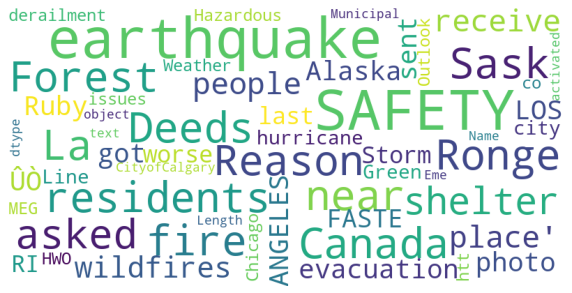

In [6]:
def show_word_cloud(data, title=None):
  wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=40, scale=2, random_state=42).generate(str(data))
  fig = plt.figure(1, figsize=(10,10))
  plt.axis('off')

  if title:
    fig.suptitle(title, fontsize = 20)
    fig.subplots_adjust(top = 2.3)

  plt.imshow(wordcloud)

  plt.show()



show_word_cloud(all_data['text'])

In [7]:
import nltk

from nltk.corpus import stopwords

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop = stopwords.words('english')

In [10]:
all_data['text'] = all_data['text'].replace(r"[^a-zA-Z0-9]", ' ', regex=True)

In [11]:
all_data['text'] = all_data['text'].replace(r"[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*@(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])", regex=True)

In [12]:
all_data["text"]=all_data["text"].replace(r"[.+\d. +]", ' ',regex=True)

In [13]:
all_data['text'] = all_data['text'].replace(r"[/^((https?|ftp|smtp):\/\/)?(www.)?[a-z0-9]+(\.[a-z]{2,}){1,3}(#?\/?[a-zA-Z0-9#]+)*\/?(\?[a-zA-Z0-9-_]+=[a-zA-Z0-9-%]+&?)?$/;]", regex=True)

In [14]:
all_data['text'] = all_data['text'].str.lower()

In [15]:
all_data['text'] = all_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [16]:
all_data["text"]=all_data["text"].str.strip()

In [17]:
all_data

,id,keyword,location,text
0,1,NaN,NaN,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,forest fire near la ronge sask canada
2,5,NaN,NaN,residents asked shelter place notified officer...
3,6,NaN,NaN,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles safety fasteners...
3259,10865,NaN,NaN,storm ri worse last hurricane city amp others ...
3260,10868,NaN,NaN,green line derailment chicago http co utbxlcbiuy
3261,10874,NaN,NaN,meg issues hazardous weather outlook hwo http ...


In [18]:
all_data = all_data.drop(['id', 'location'], axis=1)

In [19]:
all_data['keyword'].value_counts().shape

(221,)

In [20]:
all_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [21]:
all_data

,keyword,text
0,NaN,deeds reason earthquake may allah forgive us
1,NaN,forest fire near la ronge sask canada
2,NaN,residents asked shelter place notified officer...
3,NaN,people receive wildfires evacuation orders cal...
4,NaN,got sent photo ruby alaska smoke wildfires pou...
...,...,...
3258,NaN,earthquake safety los angeles safety fasteners...
3259,NaN,storm ri worse last hurricane city amp others ...
3260,NaN,green line derailment chicago http co utbxlcbiuy
3261,NaN,meg issues hazardous weather outlook hwo http ...


In [22]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.2.2)


In [23]:
from category_encoders import BinaryEncoder
be = BinaryEncoder(cols=['keyword'])
newcolumns= be.fit_transform(all_data['keyword'])
all_data=pd.concat([all_data,newcolumns],axis=1)
all_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,keyword,text,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8
0,NaN,deeds reason earthquake may allah forgive us,0,0,0,0,0,0,0,0,1
1,NaN,forest fire near la ronge sask canada,0,0,0,0,0,0,0,0,1
2,NaN,residents asked shelter place notified officer...,0,0,0,0,0,0,0,0,1
3,NaN,people receive wildfires evacuation orders cal...,0,0,0,0,0,0,0,0,1
4,NaN,got sent photo ruby alaska smoke wildfires pou...,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3258,NaN,earthquake safety los angeles safety fasteners...,0,0,0,0,0,0,0,0,1
3259,NaN,storm ri worse last hurricane city amp others ...,0,0,0,0,0,0,0,0,1
3260,NaN,green line derailment chicago http co utbxlcbiuy,0,0,0,0,0,0,0,0,1
3261,NaN,meg issues hazardous weather outlook hwo http ...,0,0,0,0,0,0,0,0,1


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
tfidf_result = tfidf.fit_transform(all_data["text"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())

In [25]:
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]


In [26]:
tfidf_df.index = all_data.index


In [27]:
all_data = pd.concat([all_data, tfidf_df], axis=1)


In [28]:
all_data

,keyword,text,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8,word_aba,word_abc,word_ablaze,word_absolutely,word_accident,word_across,word_action,word_actually,word_added,word_affected,word_aftershock,word_ago,word_ahead,word_air,word_aircraft,word_airplane,word_airport,word_alarm,word_almost,word_alone,word_already,word_also,word_always,word_ambulance,word_america,word_american,word_amid,word_amp,word_ancient,...,word_whirlwind,word_white,word_whole,word_wife,word_wild,word_wildfire,word_win,word_wind,word_windstorm,word_without,word_woman,word_women,word_womens,word_wonder,word_words,word_work,word_world,word_worst,word_would,word_wounded,word_wounds,word_wow,word_wreck,word_wreckage,word_wrecked,word_wrong,word_ya,word_yeah,word_year,word_years,word_yes,word_yesterday,word_yet,word_yo,word_york,word_young,word_youth,word_youtube,word_yr,word_zone
0,NaN,deeds reason earthquake may allah forgive us,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,forest fire near la ronge sask canada,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,residents asked shelter place notified officer...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,people receive wildfires evacuation orders cal...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,got sent photo ruby alaska smoke wildfires pou...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,NaN,earthquake safety los angeles safety fasteners...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3259,NaN,storm ri worse last hurricane city amp others ...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192926,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.280722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3260,NaN,green line derailment chicago http co utbxlcbiuy,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


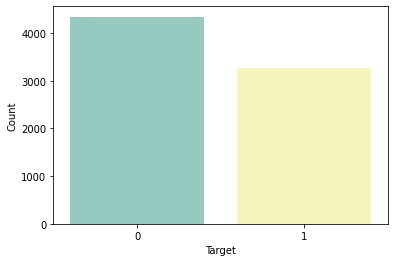

In [29]:
target_df = target_train.to_frame(name='target')

sns.countplot(target_df['target'],color='r',palette="Set3").set(xlabel='Target', ylabel='Count');

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


In [31]:
X, y = make_classification(n_samples=10000,n_features=2, n_redundant=0, n_informative=1, 
                           n_clusters_per_class=1, class_sep=0.9)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 

print('After over-sampling:\n')
print('The shape of train_X: {}'.format(X_train.shape)) 
print('The shape of train_y: {}'.format(y_train.shape)) 
  
print("Counts of label '1': {}".format(sum(y_train == 1))) 
print("Counts of label '0': {}".format(sum(y_train == 0)))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After over-sampling:

The shape of train_X: (8016, 2)
The shape of train_y: (8016,)
Counts of label '1': 4008
Counts of label '0': 4008


In [34]:
all_data

,keyword,text,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8,word_aba,word_abc,word_ablaze,word_absolutely,word_accident,word_across,word_action,word_actually,word_added,word_affected,word_aftershock,word_ago,word_ahead,word_air,word_aircraft,word_airplane,word_airport,word_alarm,word_almost,word_alone,word_already,word_also,word_always,word_ambulance,word_america,word_american,word_amid,word_amp,word_ancient,...,word_whirlwind,word_white,word_whole,word_wife,word_wild,word_wildfire,word_win,word_wind,word_windstorm,word_without,word_woman,word_women,word_womens,word_wonder,word_words,word_work,word_world,word_worst,word_would,word_wounded,word_wounds,word_wow,word_wreck,word_wreckage,word_wrecked,word_wrong,word_ya,word_yeah,word_year,word_years,word_yes,word_yesterday,word_yet,word_yo,word_york,word_young,word_youth,word_youtube,word_yr,word_zone
0,NaN,deeds reason earthquake may allah forgive us,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,forest fire near la ronge sask canada,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,residents asked shelter place notified officer...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,people receive wildfires evacuation orders cal...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,got sent photo ruby alaska smoke wildfires pou...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,NaN,earthquake safety los angeles safety fasteners...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3259,NaN,storm ri worse last hurricane city amp others ...,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192926,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.280722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3260,NaN,green line derailment chicago http co utbxlcbiuy,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [35]:
all_data=all_data.drop(['keyword'], axis=1)
all_data = all_data.drop(['text'], axis=1)

train_df=all_data.iloc[:7613]
test_df=all_data.iloc[7613:]
train_df=train_df.astype(int)
test_df=test_df.astype(int)
target_train=target_train.astype(int)

X=train_df.values
test=test_df.values
y=target_train.values

In [41]:
from sklearn.svm import SVC

In [43]:
clf = SVC(kernel='rbf',gamma='scale',probability=True)
clf.fit(X_train,y_train)
predictions_SVM = clf.predict(X_test)

The accuracy of the SVM is 95.35


Text(0.5, 1.05, 'Confusion_matrix')

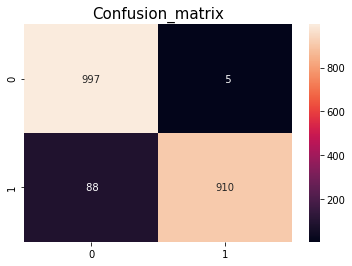

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('The accuracy of the SVM is',round(accuracy_score(predictions_SVM,y_test)*100,2))
sns.heatmap(confusion_matrix(y_test,predictions_SVM),annot=True,fmt='3.0f')
plt.title('Confusion_matrix', y=1.05, size=15)